In [2]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import jax

[]

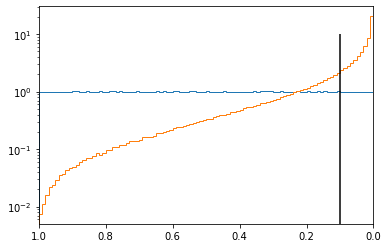

In [33]:
dist1 = sps.norm(0,1)
dist2 = sps.norm(1.5,1)
a =  dist1.rvs(int(1e6))
b =  dist2.rvs(int(1e6))

def transform(x):
    return 1-sps.norm(0,1).cdf(x)

a = transform(a)
b = transform(b)

edges = np.linspace(0,1,101)
c1,_,_=plt.hist(a,bins = edges, density=True, histtype='step');
c2,_,_=plt.hist(b,bins = edges, density=True, histtype='step');


def get_errs(a,b,cut):
    size = len(a[a<cut])/len(a)
    power = len(b[b<cut])/len(b)
    return size,power

cut = edges[10]
plt.vlines(cut,0,10,colors = 'k')
plt.xlim(1,0)
plt.semilogy()


(0.0, 1.0)

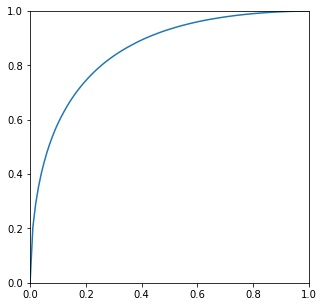

In [34]:
roc = np.array([get_errs(a,b,e) for e in edges])
plt.plot(roc[:,0],roc[:,1])
plt.gcf().set_size_inches(5,5)
plt.xlim(0,1)
plt.ylim(0,1)